# Homework-2: MLP for MNIST Classification

### In this homework, you need to
- #### implement SGD optimizer (`./optimizer.py`)
- #### implement forward and backward for FCLayer (`layers/fc_layer.py`)
- #### implement forward and backward for SigmoidLayer (`layers/sigmoid_layer.py`)
- #### implement forward and backward for ReLULayer (`layers/relu_layer.py`)
- #### implement EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### implement SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [4]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [5]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. MLP with Euclidean Loss
In part-1, you need to train a MLP with **Euclidean Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively.
### TODO
Before executing the following code, you should complete **./optimizer.py** and **criterion/euclidean_loss.py**.

In [6]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 MLP with Euclidean Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/fc_layer.py** and **layers/sigmoid_layer.py**.

In [7]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.
Epoch [0][20]	 Batch [0][550]	 Training Loss 0.0457	 Accuracy 0.1900
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.0135	 Accuracy 0.2529
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.0121	 Accuracy 0.3510
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.0103	 Accuracy 0.4276
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.0087	 Accuracy 0.4939
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.0075	 Accuracy 0.5431
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.0066	 Accuracy 0.5805
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.0058	 Accuracy 0.6105
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.0052	 Accuracy 0.6358
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.0047	 Accuracy 0.6555
Epoch [0][20]	 Batch [500][550]	 Training 

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9324.



## 1.2 MLP with Euclidean Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/relu_layer.py**.

In [10]:
from layers import ReLULayer

reluMLP = Network()
# TODO build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 0.0831	 Accuracy 0.0800
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.0023	 Accuracy 0.2980
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.0019	 Accuracy 0.4176
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.0018	 Accuracy 0.4807
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.0016	 Accuracy 0.5281
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.0016	 Accuracy 0.5656
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.0015	 Accuracy 0.5929
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.0015	 Accuracy 0.6147
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.0014	 Accuracy 0.6340
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.0014	 Accuracy 0.6488
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.0013	 Accuracy 0.6623

Epoch [0]	 Average training loss 0.0013	 Average training accuracy 0.6743
Epoch [0]	 Average validation loss 0.0001	 Average validation accuracy 0.8432

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.0003	 Accuracy 0.8600

In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9104.



## Plot

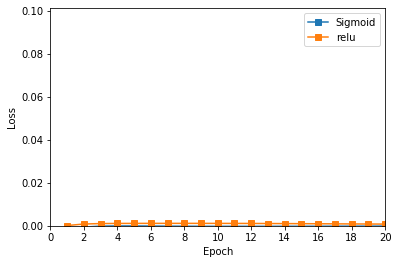

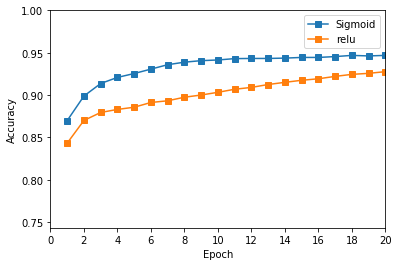

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. MLP with Softmax Cross-Entropy Loss
In part-2, you need to train a MLP with **Softmax Cross-Entropy Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively again.
### TODO
Before executing the following code, you should complete **criterion/softmax_cross_entropy_loss.py**.

In [14]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Softmax cross-entropy loss function.

In [15]:
sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### Train

In [16]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss -0.0295	 Accuracy 0.0700
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.0162	 Accuracy 0.2351
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.0182	 Accuracy 0.3265
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.0208	 Accuracy 0.3851
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.0236	 Accuracy 0.4338
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.0260	 Accuracy 0.4739
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.0284	 Accuracy 0.5052
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.0304	 Accuracy 0.5300
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.0322	 Accuracy 0.5535
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.0339	 Accuracy 0.5750
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.0355	 Accuracy 0.5948

Epoch [0]	 Average training loss 0.0370	 Average training accuracy 0.6133
Epoch [0]	 Average validation loss 0.0555	 Average validation accuracy 0.8450

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.0552	 Accuracy 0.860

### Test

In [17]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9329.



## 2.2 MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [18]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [19]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 0.0150	 Accuracy 0.2000
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.0300	 Accuracy 0.2622
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.0365	 Accuracy 0.3724
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.0400	 Accuracy 0.4477
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.0423	 Accuracy 0.5007
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.0440	 Accuracy 0.5414
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.0454	 Accuracy 0.5723
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.0462	 Accuracy 0.5962
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.0471	 Accuracy 0.6179
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.0478	 Accuracy 0.6359
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.0483	 Accuracy 0.6503

Epoch [0]	 Average training loss 0.0489	 Average training accuracy 0.6633
Epoch [0]	 Average validation loss 0.0575	 Average validation accuracy 0.8350

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.0576	 Accuracy 0.8600

In [20]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9150.



## Plot

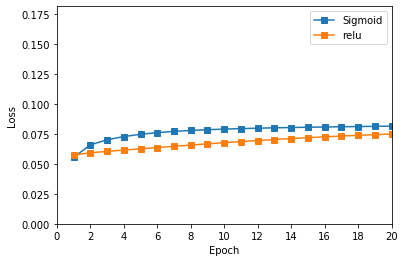

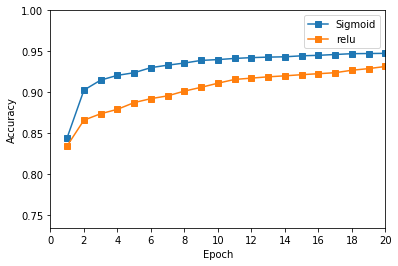

In [21]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

### ~~You have finished homework2-mlp, congratulations!~~  

**Next, according to the requirements 4) of report:**
### **You need to construct a two-hidden-layer MLP, using any activation function and loss function.**

**Note: Please insert some new cells blow (using '+' bottom in the toolbar) refer to above codes. Do not modify the former code directly.**

# Two-Hidden-Layer MLP with Euclidean Loss ( ReLU and Sigmoid )


In [22]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

In [23]:
twolayer = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
twolayer.add(FCLayer(784, 128))
twolayer.add(SigmoidLayer())
twolayer.add(ReLULayer())
twolayer.add(FCLayer(128, 10))


In [24]:
twolayer, twolayer_loss, twolayer_acc = train(twolayer, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss -0.1460	 Accuracy 0.0600
Epoch [0][20]	 Batch [50][550]	 Training Loss -0.0580	 Accuracy 0.1443
Epoch [0][20]	 Batch [100][550]	 Training Loss -0.0245	 Accuracy 0.1813
Epoch [0][20]	 Batch [150][550]	 Training Loss -0.0132	 Accuracy 0.2111
Epoch [0][20]	 Batch [200][550]	 Training Loss -0.0079	 Accuracy 0.2422
Epoch [0][20]	 Batch [250][550]	 Training Loss -0.0047	 Accuracy 0.2722
Epoch [0][20]	 Batch [300][550]	 Training Loss -0.0026	 Accuracy 0.3002
Epoch [0][20]	 Batch [350][550]	 Training Loss -0.0012	 Accuracy 0.3225
Epoch [0][20]	 Batch [400][550]	 Training Loss -0.0001	 Accuracy 0.3413
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.0007	 Accuracy 0.3602
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.0012	 Accuracy 0.3777

Epoch [0]	 Average training loss 0.0017	 Average training accuracy 0.3950
Epoch [0]	 Average validation loss 0.0062	 Average validation accuracy 0.6092

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.0071	 Accura

In [25]:
test(twolayer, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8547.



# Two hidden layer MLP with Softmax Cross-Entropy Loss function

In [26]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

In [27]:
twolayers = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
twolayers.add(FCLayer(784, 128))
twolayers.add(SigmoidLayer())
twolayers.add(ReLULayer())
twolayers.add(FCLayer(128, 10))

In [28]:
twolayers, twolayers_loss, twolayers_acc = train(twolayers, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 0.0096	 Accuracy 0.0800
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.0118	 Accuracy 0.1322
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.0115	 Accuracy 0.1712
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.0118	 Accuracy 0.1930
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.0125	 Accuracy 0.2170
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.0133	 Accuracy 0.2408
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.0141	 Accuracy 0.2634
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.0148	 Accuracy 0.2814
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.0155	 Accuracy 0.2981
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.0162	 Accuracy 0.3142
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.0169	 Accuracy 0.3315

Epoch [0]	 Average training loss 0.0176	 Average training accuracy 0.3480
Epoch [0]	 Average validation loss 0.0255	 Average validation accuracy 0.5572

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.0245	 Accuracy 0.4900

In [29]:
test(twolayers, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8604.



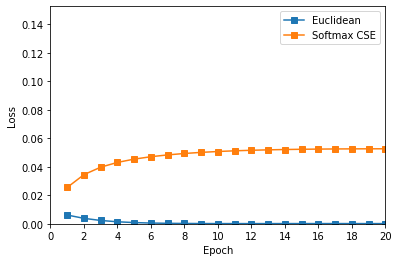

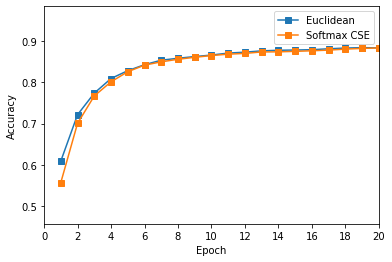

In [30]:
plot_loss_and_acc({'Euclidean': [twolayer_loss, twolayer_acc],
                   'Softmax CSE': [twolayers_loss, twolayers_acc]})